In [6]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [7]:
cigs = pd.read_excel("/content/drive/MyDrive/Data Science/Module_2/assignment_01_ML/Assignment_Datasets/Cigs.xls")
cigs.head()

,Brand,Tar,Nicotine,Wt,CO
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,29.8,2.03,1.1650,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4


In [8]:
cigs.shape

(25, 5)

In [9]:
cigs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Brand     25 non-null     object 
 1   Tar       25 non-null     float64
 2   Nicotine  25 non-null     float64
 3   Wt        25 non-null     float64
 4   CO        25 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.1+ KB


In [10]:
cigs.describe()

,Tar,Nicotine,Wt,CO
count,25.00000,25.000000,25.000000,25.000000
mean,12.21600,0.876400,0.970284,12.528000
std,5.66581,0.354058,0.087721,4.739684
min,1.00000,0.130000,0.785100,1.500000
25%,8.60000,0.690000,0.922500,10.000000
50%,12.80000,0.900000,0.957300,13.000000
75%,15.10000,1.020000,1.007000,15.400000
max,29.80000,2.030000,1.165000,23.500000


Checking null Values

In [11]:
cigs.isnull().sum()

Brand       0
Tar         0
Nicotine    0
Wt          0
CO          0
dtype: int64

**Data Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

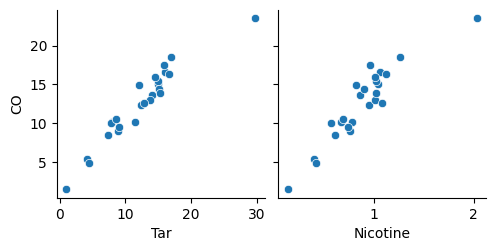

In [12]:
sns.pairplot(cigs, x_vars = ['Tar', 'Nicotine'], y_vars = 'CO', kind = 'scatter')
plt.show

In [13]:
corealtaion_coefficient = cigs['CO'].corr(cigs['Tar'])
print(corealtaion_coefficient)

0.957485329713691


In [14]:
corealtaion_coefficient_2 = cigs['CO'].corr(cigs['Nicotine'])
print(corealtaion_coefficient_2)

0.925947305159631


Tar and Nicotine are highly positively corelated with CO
, This suggests that cigarettes with higher tar and Nicotine content tend to have higher CO content.

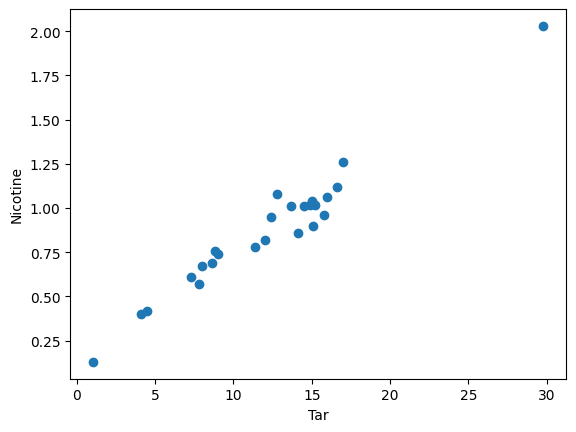

In [15]:
plt.scatter(cigs.Tar, cigs.Nicotine)
plt.xlabel("Tar")
plt.ylabel("Nicotine")
plt.show()

In [16]:
corealtaion_coefficient_3 = cigs['Nicotine'].corr(cigs['Tar'])
print(corealtaion_coefficient_3)

0.976607634469475


Tar and Nicotine are also highly positively correlated.
This suggests that cigarettes with higher tar content tend to have higher nicotine content.

**Data Splitting**

In [17]:
train=cigs.sample(frac=0.80,random_state=1)
test=cigs.drop(train.index)

**Model Training**

In [18]:
import  statsmodels.formula.api as smf

In [19]:
reg_1 = smf.ols('CO ~ Tar + Nicotine', data = train).fit()
print(reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     92.81
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           7.11e-10
Time:                        10:00:22   Log-Likelihood:                -35.728
No. Observations:                  20   AIC:                             77.46
Df Residuals:                      17   BIC:                             80.44
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0632      1.002      3.056      0.0

In [20]:
# normality check
stats.shapiro(reg_1.resid)

ShapiroResult(statistic=0.9764097929000854, pvalue=0.8798674941062927)

In [21]:
x_test=test.iloc[:,[1,2]]
y_pred=reg_1.predict(x_test)

**Mean Square Error**

In [22]:
from sklearn.metrics import mean_squared_error

In [23]:
mean_squared_error(test.CO,y_pred)

0.4619891709012348

In [24]:
x = cigs[['Tar','Nicotine']]
x

,Tar,Nicotine
0,14.1,0.86
1,16.0,1.06
2,29.8,2.03
3,8.0,0.67
4,4.1,0.40
5,15.0,1.04
6,8.8,0.76
7,12.4,0.95
8,16.6,1.12
9,14.9,1.02


**Check for multicollinearity**

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [26]:
vif=[variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
pd.Series(vif,index=x.columns)

Tar         104.568172
Nicotine    104.568172
dtype: float64

**Homocedasticity and linearity check**

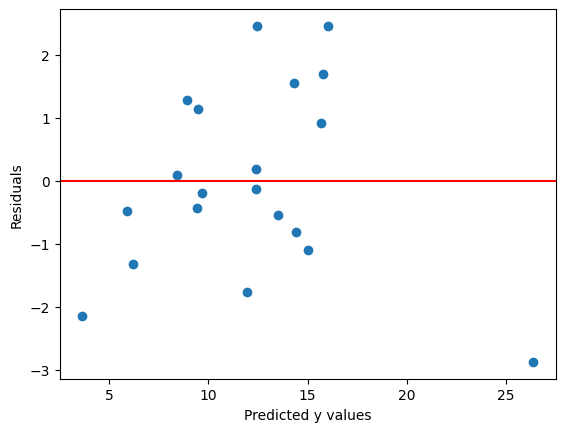

In [27]:
plt.scatter(reg_1.fittedvalues,reg_1.resid)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.axhline(0,color = 'red')

**Removing Outliers**

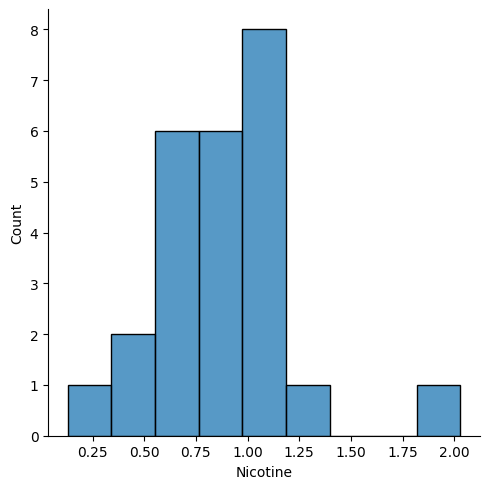

In [28]:
sns.displot(cigs['Nicotine'])

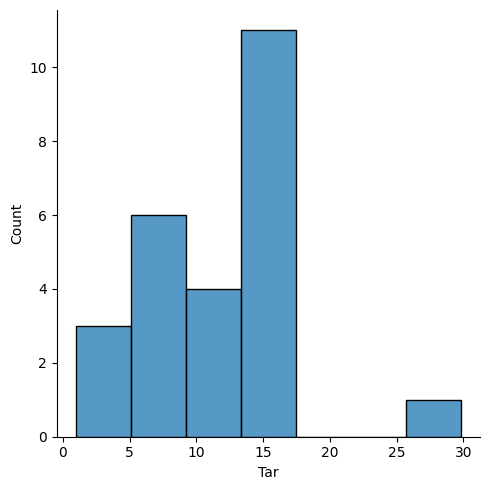

In [29]:
sns.displot(cigs['Tar'])

<Axes: >

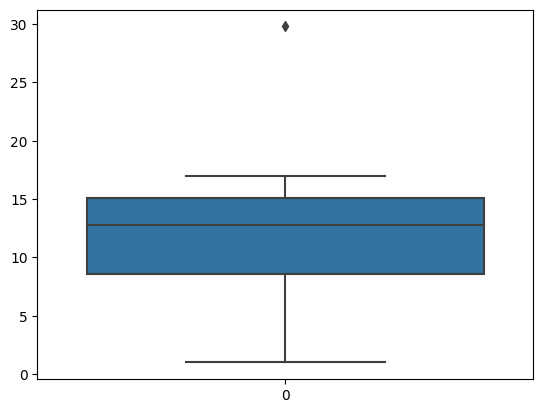

In [30]:
sns.boxplot(cigs['Tar'])

<Axes: >

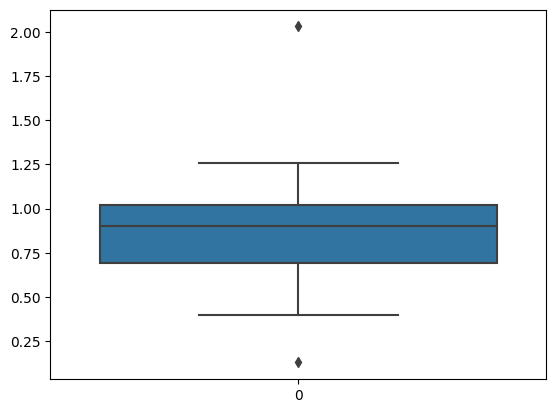

In [31]:
sns.boxplot(cigs['Nicotine'])

In [32]:
cigs.describe()

,Tar,Nicotine,Wt,CO
count,25.00000,25.000000,25.000000,25.000000
mean,12.21600,0.876400,0.970284,12.528000
std,5.66581,0.354058,0.087721,4.739684
min,1.00000,0.130000,0.785100,1.500000
25%,8.60000,0.690000,0.922500,10.000000
50%,12.80000,0.900000,0.957300,13.000000
75%,15.10000,1.020000,1.007000,15.400000
max,29.80000,2.030000,1.165000,23.500000


In [33]:
Q1 = cigs.quantile(0.25)
Q3 = cigs.quantile(0.75)
Q1,Q3

(Tar          8.6000
 Nicotine     0.6900
 Wt           0.9225
 CO          10.0000
 Name: 0.25, dtype: float64,
 Tar         15.100
 Nicotine     1.020
 Wt           1.007
 CO          15.400
 Name: 0.75, dtype: float64)

In [34]:
IQR = Q3 - Q1
IQR

Tar         6.5000
Nicotine    0.3300
Wt          0.0845
CO          5.4000
dtype: float64

In [35]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
lower_limit,upper_limit

(Tar        -1.15000
 Nicotine    0.19500
 Wt          0.79575
 CO          1.90000
 dtype: float64,
 Tar         24.85000
 Nicotine     1.51500
 Wt           1.13375
 CO          23.50000
 dtype: float64)

In [36]:
import numpy as np

In [37]:
cigs2 = cigs[~((cigs < (Q1 - 1.5 * IQR)) | (cigs > (Q3 + 1.5 * IQR)))]
cigs2

,Brand,Tar,Nicotine,Wt,CO
0,Alpine,14.1,0.86,0.9853,13.6
1,Benson&Hedges,16.0,1.06,1.0938,16.6
2,BullDurham,NaN,NaN,NaN,23.5
3,CamelLights,8.0,0.67,0.9280,10.2
4,Carlton,4.1,0.40,0.9462,5.4
5,Chesterfield,15.0,1.04,0.8885,15.0
6,GoldenLights,8.8,0.76,1.0267,9.0
7,Kent,12.4,0.95,0.9225,12.3
8,Kool,16.6,1.12,0.9372,16.3
9,L&M,14.9,1.02,0.8858,15.4


In [38]:
cigs2 = cigs2.dropna()

In [39]:
cigs2.shape

(23, 5)

In [40]:
cigs2.describe()

,Tar,Nicotine,Wt,CO
count,23.000000,23.000000,23.00000,23.000000
mean,11.939130,0.858696,0.96987,12.530435
std,3.894488,0.224971,0.07150,3.675154
min,4.100000,0.400000,0.85170,4.900000
25%,8.700000,0.715000,0.92525,10.100000
50%,12.800000,0.900000,0.95730,13.000000
75%,15.050000,1.020000,0.99615,15.200000
max,17.000000,1.260000,1.12400,18.500000


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

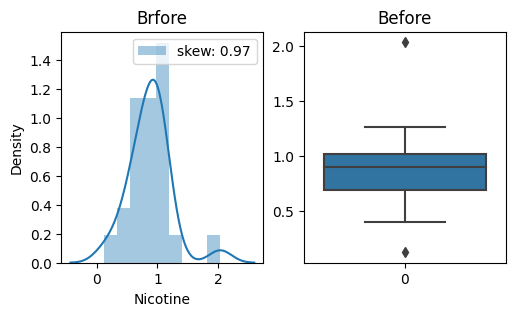

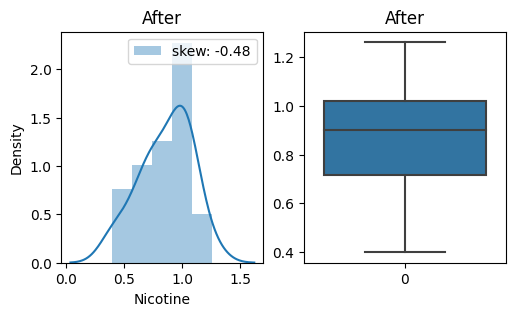

In [42]:
plt.figure(figsize = (12,3))

plt.subplot(141)
sns.distplot(cigs['Nicotine'], label="skew: " + str(np.round(cigs['Nicotine'].skew(),2)))
plt.title('Brfore')
plt.legend()

plt.subplot(142)
sns.boxplot(cigs['Nicotine'])
plt.title('Before')

plt.figure(figsize = (12,3))
plt.subplot(143)
sns.distplot(cigs2['Nicotine'], label="skew: " + str(np.round(cigs2['Nicotine'].skew(),2)))
plt.title('After')
plt.legend()


plt.subplot(144)
sns.boxplot(cigs2['Nicotine'])
plt.title('After')
plt.show()

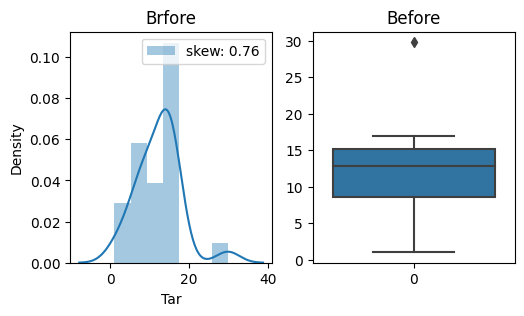

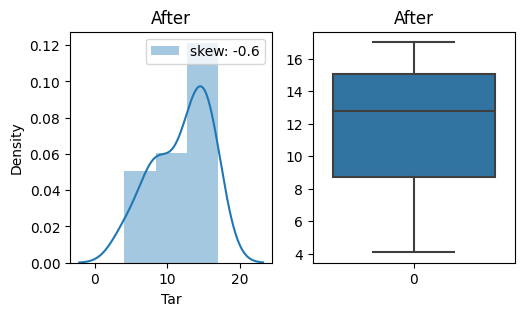

In [43]:
plt.figure(figsize = (12,3))

plt.subplot(141)
sns.distplot(cigs['Tar'], label="skew: " + str(np.round(cigs['Tar'].skew(),2)))
plt.title('Brfore')
plt.legend()

plt.subplot(142)
sns.boxplot(cigs['Tar'])
plt.title('Before')

plt.figure(figsize = (12,3))
plt.subplot(143)
sns.distplot(cigs2['Tar'], label="skew: " + str(np.round(cigs2['Tar'].skew(),2)))
plt.title('After')
plt.legend()


plt.subplot(144)
sns.boxplot(cigs2['Tar'])
plt.title('After')
plt.show()

In [44]:
train2 = cigs2.sample(frac=0.80,random_state=1)
test2 = cigs2.drop(train2.index)

In [45]:
reg_2 = smf.ols('CO ~ Tar + Nicotine', data = train2).fit()
print(reg_2.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     93.33
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           3.43e-09
Time:                        10:00:26   Log-Likelihood:                -26.289
No. Observations:                  18   AIC:                             58.58
Df Residuals:                      15   BIC:                             61.25
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6442      1.140      1.442      0.1

In [46]:
reg_3 = smf.ols('CO ~ Tar', data = train2).fit()
print(reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     198.6
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.94e-10
Time:                        10:00:26   Log-Likelihood:                -26.312
No. Observations:                  18   AIC:                             56.62
Df Residuals:                      16   BIC:                             58.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7921      0.824      2.174      0.0

In [47]:
reg_4 = smf.ols('CO ~ Nicotine', data = train2).fit()
print(reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     82.10
Date:                Wed, 03 Jan 2024   Prob (F-statistic):           1.06e-07
Time:                        10:00:26   Log-Likelihood:                -33.355
No. Observations:                  18   AIC:                             70.71
Df Residuals:                      16   BIC:                             72.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2927      1.497     -0.196      0.8

We have to drop on feature becz both are positive co related with each others,thats why we are choosing Tar and remove Nicotine from my model.Becz Tar have lower error than Nicotine.

In [48]:
x_test2 = test.iloc[:,[1,2]]
y_pred2 = reg_3.predict(x_test2)

**Homoscedasticity**

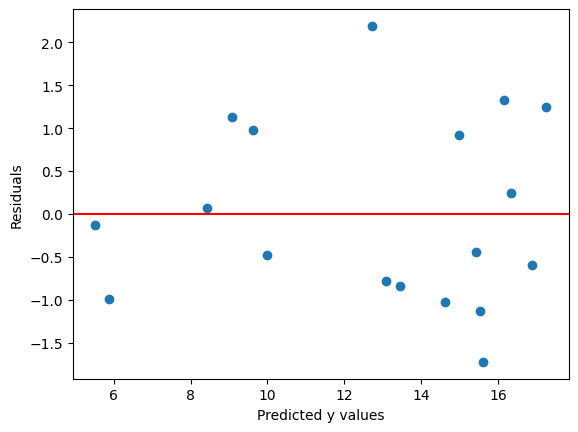

In [49]:
plt.scatter(reg_3.fittedvalues,reg_3.resid)
plt.xlabel("Predicted y values")
plt.ylabel("Residuals")
plt.axhline(0, color = 'red')

In [50]:
# check for multicollinearity
X2= cigs2[['Tar','Nicotine']]
vif2=[variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
pd.Series(vif2,index=X2.columns)

Tar         88.0272
Nicotine    88.0272
dtype: float64

**If Tar increase by 1 mg then CO will increase by 0.9098 mg**